In [105]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt 
# from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split,cross_val_score
#from Orange.classification import tree

In [3]:
Data = pd.read_excel('Data.xlsx')
Data = Data.set_index('Date')

In [5]:
Data.isnull().any();

In [6]:
df1 = Data.dropna(axis=0,how='any')
#Data = Data.fillna(method='ffill')
Y = df1['Class']
X = df1.drop('Class', axis = 1)

In [7]:
df1.corr();

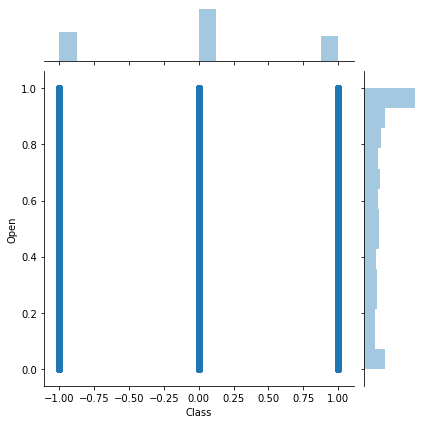

In [8]:
import seaborn as sns
%matplotlib inline
sns.jointplot(x="Class",y="Open",data=df1)

In [13]:
df1.shape
len(df1)
len(df1.columns)

68

In [33]:
#Hpyer_Parameters = [[1,2,3,4,5,6,7,8,9,]]
#set_parameters = [i for i in it.product(*Hpyer_Parameters)]
#n=0
Epsilon = 0.2
delta = 0.1
h_aprox = len(df1.columns)
dimVC =h_aprox   # Poner aqui la dimVC
def n_est(Epsilon,delta,h_aprox):
    return int(np.ceil((1/Epsilon)*(np.log(h_aprox) + np.log(1/delta))))
     
n=n_est(Epsilon,delta,h_aprox)
n

33

### $\eta$ minimo estimado

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics,model_selection

#cross_val_score, cross_val_predict


In [111]:
Accuracy= []
scores=[]
lm = LinearRegression() 
for i in range (n,len(df1),1):
    X1_tr, X1_ts, Y1_tr, Y1_ts = train_test_split(X, Y, train_size = i/X.shape[0], random_state=19)
    X1_va, X1_ts, Y1_va, Y1_ts = train_test_split(X1_ts, Y1_ts, train_size = 0.5, random_state=19)
    model = lm.fit(X1_tr, Y1_tr)
    predictions = lm.predict(X1_ts)
    Accuracy.append(metrics.r2_score(Y1_ts, predictions))
    scores.append(cross_val_score(model, X1_ts, Y1_ts, cv=6))
len(Accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

ValueError: Cannot have number of splits n_splits=6 greater than the number of samples: n_samples=5.

In [121]:
N=list(range(len(scores)))

In [123]:
len(scores)

4032

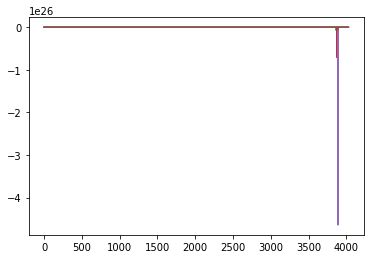

In [124]:
plt.plot(N,scores)

In [75]:
n_est

28

# AQUI EL ALGORITMO USANDO X1

### $\eta$ minimo optimo

In [41]:
n_opt = int(np.ceil((1/Epsilon)*(np.log(dimVC) + np.log(1/delta))))
X2_tr, X2_ts, Y2_tr, Y2_ts = train_test_split(X, Y, train_size = n_opt/X.shape[0], random_state=123)

In [14]:
n_opt

33

# AQUI EL ALGORITMO USANDO X2

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [16]:
df1.describe()

,Class,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,Ope_Max,Hig_Max,Low_Max,Vol_Min,Clo_Min,Ope_Min,Hig_Min,Low_Min,Support,Resistance
count,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,...,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000
mean,-0.036319,0.590257,0.580197,0.589019,0.592268,0.344043,0.541117,0.722314,0.496906,0.638600,...,0.723613,0.721381,0.721504,0.546550,0.726893,0.723613,0.721381,0.721504,0.684468,0.393750
std,0.712575,0.326031,0.337365,0.328892,0.327860,0.240709,0.233415,0.313028,0.300572,0.225858,...,0.294296,0.303761,0.300488,0.288637,0.294071,0.294296,0.303761,0.300488,0.283691,0.278469
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.315708,0.277357,0.311266,0.316808,0.166706,0.391286,0.545536,0.245324,0.506869,...,0.546861,0.536755,0.539257,0.333115,0.556980,0.546861,0.536755,0.539257,0.512814,0.167924
50%,0.000000,0.635394,0.625498,0.636634,0.637622,0.292758,0.553456,0.875003,0.497192,0.678596,...,0.823513,0.833252,0.829943,0.534658,0.830793,0.823513,0.833252,0.829943,0.770584,0.349522
75%,0.000000,0.898464,0.905599,0.900373,0.904023,0.477052,0.702674,0.955035,0.746276,0.807013,...,0.983995,0.993983,0.992667,0.773139,0.991234,0.983995,0.993983,0.992667,0.923285,0.573778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
regressor = LinearRegression()  
regressor.fit(X2_tr,Y2_tr) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

4.558820432786255
[-0.98048322 -0.21715576 -0.40922939  0.64796133 -0.94680966 -0.05896242
 -0.45417215 -0.47395538 -1.34069338 -3.45987696 -0.23190032  0.08064047
 -0.82741425 -1.00794308  0.50450883 -0.17565639  1.10089792  1.69726492
 -0.10128724 -1.11722689 -1.3976723   0.17398753  0.29596392 -0.6204434
  1.12995352  0.9388982   0.25068282 -1.06042144 -1.16099571 -1.0638517
 -0.15033365 -0.54413444  2.56376096 -0.71138993  1.34998124  1.07417976
  0.75286404  0.5520399   0.25185434 -0.24120391  0.67707927 -0.32584277
 -0.67575495 -0.58171557  0.22339302 -0.45415252 -2.00854161 -0.66985836
 -0.60568407  1.35303269 -0.60568407  0.63148021  0.64475089  0.64709487
  0.64796133 -0.14911316 -0.90606866 -0.89527132  0.73826022 -0.55760608
 -0.14911316 -0.90606866 -0.89527132  0.73826022 -0.55760608  0.91346341
  0.45361931]


In [44]:
y_pred = regressor.predict(X2_ts)

In [45]:
df = pd.DataFrame({'Actual': Y2_ts, 'Predicted': y_pred})
df.head(5)

,Actual,Predicted
Date,,
2008-03-18,1,0.033289
2013-06-07,1,-0.132384
2006-05-09,1,1.089625
2005-04-07,0,0.465080
2015-01-16,0,0.649463


In [52]:
y_pred

array([ 0.03328937, -0.13238364,  1.08962482, ...,  1.9700447 ,
       -0.11162569, -0.367477  ])

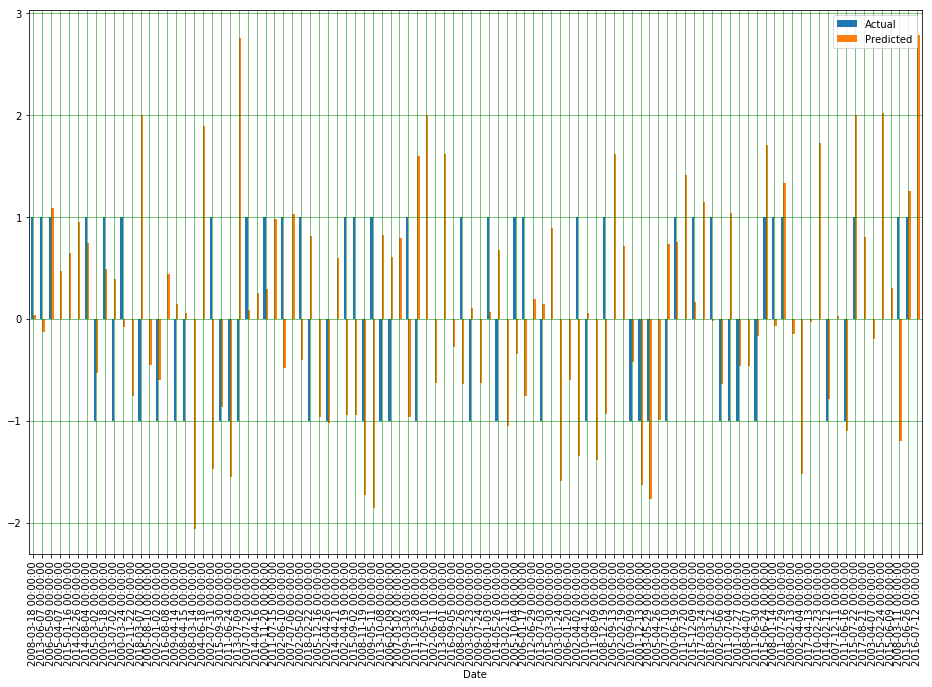

In [47]:
df2 = df.head(100)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [26]:
len(X2_ts)

4042

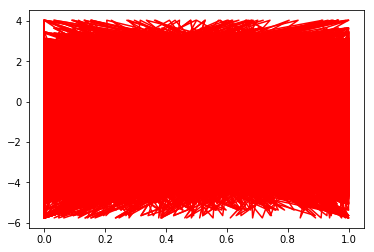

In [48]:
#plt.scatter(X2_ts, Y2_ts,  color='gray')
plt.plot(X2_ts, y_pred, color='red') #, linewidth=2
plt.show()

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y2_ts, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y2_ts, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y2_ts, y_pred)))

Mean Absolute Error: 1.1310543399108726
Mean Squared Error: 2.0687112656095814
Root Mean Squared Error: 1.4383015211038266


In [51]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Open,-0.980483
High,-0.217156
Low,-0.409229
Close,0.647961
Volume,-0.946810
volume_adi,-0.058962
volume_obv,-0.454172
volume_cmf,-0.473955
volume_fi,-1.340693
volume_em,-3.459877


# Regresion logística

In [53]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X2_tr,Y2_tr)

#
y_pred_lg=logreg.predict(X2_ts)

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [54]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y2_ts, y_pred_lg)
cnf_matrix

array([[ 176,  584,  341],
       [ 236, 1274,  477],
       [ 186,  492,  276]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

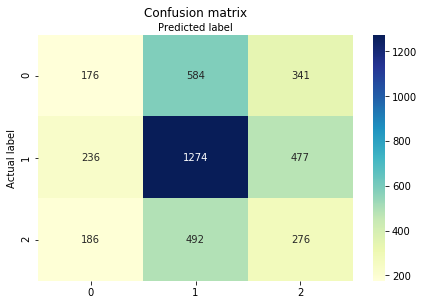

In [55]:
class_names=[-1,0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
print("Accuracy:",metrics.accuracy_score(Y2_ts, y_pred_lg))
print("Precision:",metrics.precision_score(Y2_ts, y_pred_lg))
print("Recall:",metrics.recall_score(Y2_ts, y_pred_lg))

Accuracy: 0.42701632855022265


ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [60]:
y_pred_proba = logreg.predict_proba(X2_ts)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y2_ts,  y_pred_proba)
auc = metrics.roc_auc_score(Y2_ts, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ValueError: multiclass format is not supported

In [57]:
#INTENTANDO QUE RECONOZCA TRES ESTADOS
LR_m=LogisticRegression(multi_class="multinomial",solver ="newton-cg").fit(X2_tr,Y2_tr)
#
y_pred_LM=LR_m.predict(X2_ts)

In [58]:
cnf_matrix_m = metrics.confusion_matrix(Y2_ts, y_pred_LM)
cnf_matrix_m

array([[ 225,  555,  321],
       [ 293, 1202,  492],
       [ 223,  476,  255]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

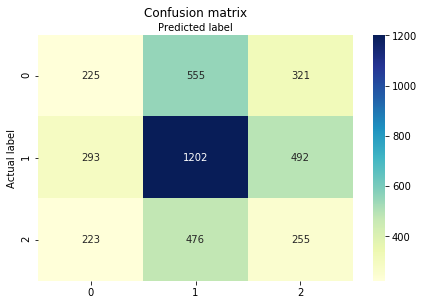

In [59]:
class_names=[-1,0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')